# WELCOM ALL
#                           National tourism promotion
> **Tip**: Worldwide public holidays. Additional information available at https://docs.microsoft.com/en-us/azure/open-datasets/dataset-public-holidays?tabs=azure-storage#data-access
•	countryOrRegion: string - country or region full name

•	countryOrRegionCode: string - country or region in ISO format

•	date: date - date of the holiday

•	holidayName: string - full name of the holiday

•	isPaidTimeOff: boolean - indicates whether most people have paid time off on this date 

   (only available for US, GB, and India now). If it is NULL, it means unknown

•	normalizeHolidayName: normalized name of the holiday


# the description
> **Tip**:In this analysis, I used a dataset (Holidays.csv,EuropeTop100Attractions_ENG)
EuropeTop100Attractions_ENG data set:ID-Name-Country-ISO

> **Tip**: EuropeTop100Attractions_ENG dataset: Reviews published in Tripadvisor from January 1, 2019 to August 21, 2021, in English, for the top 100 tourist attractions in Europe.

Information about the attractions.

ID: string - ID of the attraction

Name: string - name of the attraction

Country: string - name of the country or region

ISO: string - ISO code of the country or region


## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Analytical questions">Analytical questions</a></li>
<li><a href="#Data Visualization">Data Visualization</a></li>

</ul>

<a id='wrangling'></a>

### importing Python libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
#import matplotlib as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
import pandas as pd
import glob
my_df_list = [pd.read_excel(f) for f in glob.iglob('Asterix_*.xlsx')]


### read data

In [2]:
df=pd.read_csv("Holidays.csv",sep=";")


In [3]:
df1=pd.read_csv("EuropeTop100Attractions_ENG_20190101_20210829.csv",engine='python',on_bad_lines='skip',encoding="'cp850'")

In [4]:
df.head()

,Unnamed: 0,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
0,0,Argentina,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day],NaN,AR,1970-01-01
1,1,Australia,New Year's Day,New Year's Day,NaN,AU,1970-01-01
2,2,Austria,Neujahr,Neujahr,NaN,AT,1970-01-01
3,3,Belgium,Nieuwjaarsdag,Nieuwjaarsdag,NaN,BE,1970-01-01
4,4,Brazil,Ano novo,Ano novo,NaN,BR,1970-01-01


### Data extraction and description

In [11]:
df1.head()

,ID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ


In [10]:
df1.tail()

,ID,Name,Country,ISO
95,MAG096,Duomo di Pisa,Italy,IT
96,MAG097,La Lonja de la Seda,Spain,ES
97,MAG098,The Walls of Avila,Spain,ES
98,MAG099,Place Stanislas,France,FR
99,MAG100,Centro Storico,Italy,IT


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       100 non-null    object
 1   Name     100 non-null    object
 2   Country  100 non-null    object
 3   ISO      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69557 entries, 0 to 69556
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            69557 non-null  int64 
 1   countryOrRegion       69557 non-null  object
 2   holidayName           69557 non-null  object
 3   normalizeHolidayName  69557 non-null  object
 4   isPaidTimeOff         3934 non-null   object
 5   countryRegionCode     64559 non-null  object
 6   date                  69557 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [9]:
df1.describe()


,ID,Name,Country,ISO
count,100,100,100,100
unique,100,99,26,25
top,MAG001,Old Town,Spain,ES
freq,1,2,17,17


In [10]:
df.describe()


,Unnamed: 0
count,69557.000000
mean,34778.000000
std,20079.520674
min,0.000000
25%,17389.000000
50%,34778.000000
75%,52167.000000
max,69556.000000


In [11]:
print(df.dtypes)


Unnamed: 0               int64
countryOrRegion         object
holidayName             object
normalizeHolidayName    object
isPaidTimeOff           object
countryRegionCode       object
date                    object
dtype: object


In [12]:
df.describe(include = [np.number])


,Unnamed: 0
count,69557.000000
mean,34778.000000
std,20079.520674
min,0.000000
25%,17389.000000
50%,34778.000000
75%,52167.000000
max,69556.000000


> **Tip**: When looking to analyze the data of tourists, we find that the number of tourists is 69557

In [13]:
df.isnull()

,Unnamed: 0,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
69552,False,False,False,False,True,False,False
69553,False,False,False,False,False,False,False
69554,False,False,False,False,True,True,False
69555,False,False,False,False,True,False,False


In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69552    False
69553    False
69554    False
69555    False
69556    False
Length: 69557, dtype: bool

In [15]:
df1.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [16]:
df.duplicated().sum()

0

> **Tip**:Note that there is no duplicate data

In [17]:
df1.duplicated().sum()

0

<a id='eda'></a>
 ## Exploratory Data Analysis

### By looking, we notice that there is no null other than in the two columns [ isPaidTimeOff,countryRegionCode ] and in the column isPaidTimeOff    If it is NULL, it means unknown Which means that there are an unknown number 65623 of tourists and their payment status

In [18]:
df.isna().sum()


Unnamed: 0                  0
countryOrRegion             0
holidayName                 0
normalizeHolidayName        0
isPaidTimeOff           65623
countryRegionCode        4998
date                        0
dtype: int64

In [9]:
df['isPaidTimeOff'].sum()

2695

### Number of tourists known payment status [  no, off] 2695 tourists

In [19]:
df1.isna().sum()


ID         0
Name       0
Country    0
ISO        0
dtype: int64

In [20]:
df.notnull().head()

,Unnamed: 0,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
0,True,True,True,True,False,True,True
1,True,True,True,True,False,True,True
2,True,True,True,True,False,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,False,True,True


In [9]:
df1.notnull().head()

,ID,Name,Country,ISO
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [22]:
df.isnull().sum().sum()

70621

In [23]:
df1.isnull().sum().sum()

0

In [24]:
df.notnull().sum()

Unnamed: 0              69557
countryOrRegion         69557
holidayName             69557
normalizeHolidayName    69557
isPaidTimeOff            3934
countryRegionCode       64559
date                    69557
dtype: int64

In [8]:
df1.notnull().sum()

ID         100
Name       100
Country    100
ISO        100
dtype: int64

<a id='Data Visualization'></a>

## Data Visualization

<AxesSubplot:xlabel='countryOrRegion', ylabel='isPaidTimeOff'>

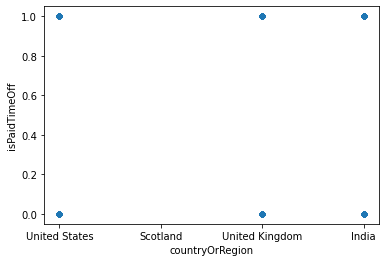

In [26]:
df[['countryOrRegion', 'isPaidTimeOff']].plot.scatter(x ='countryOrRegion', y='isPaidTimeOff')
#mp.pyplot.title('Age ratio  of Scholarship',fontsize=14)

<AxesSubplot:xlabel='count', ylabel='isPaidTimeOff'>

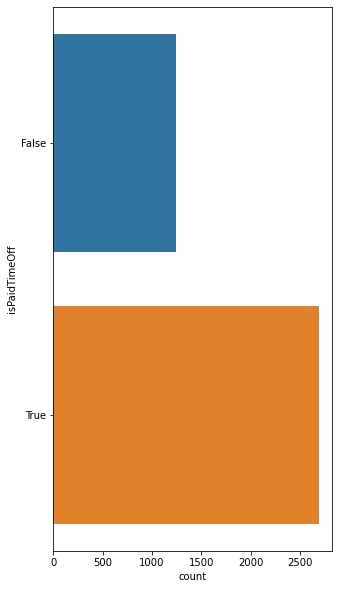

In [27]:
plt.figure(figsize=(5,10))
sns.countplot(y='isPaidTimeOff', data=df)

<a id='Analytical questions'></a>

## Analytical questions

## What is the largest percentage of paid or unpaid?

### The percentage of tourists who take paid vacations is greater than those who take unpaid vacations

In [28]:
df.isnull()

,Unnamed: 0,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
69552,False,False,False,False,True,False,False
69553,False,False,False,False,False,False,False
69554,False,False,False,False,True,True,False
69555,False,False,False,False,True,False,False


In [4]:
pip install future


Note: you may need to restart the kernel to use updated packages.


### column description ['countryOrRegion']

In [30]:
df['countryOrRegion']

0             Argentina
1             Australia
2               Austria
3               Belgium
4                Brazil
              ...      
69552            Sweden
69553    United Kingdom
69554             Wales
69555            Norway
69556            Sweden
Name: countryOrRegion, Length: 69557, dtype: object

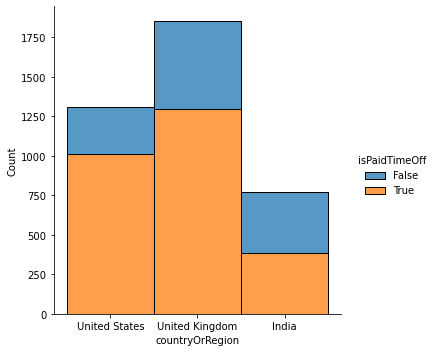

In [43]:

sns.displot(df, x="countryOrRegion", bins=20,hue="isPaidTimeOff", multiple="stack")


### Looking at the Graph at the top, we find that the highest percentage of tourists who took paid vacations are in the next group United Kingdom after that United States and come in the last India

### visualization of a column "isPaidTimeOff"

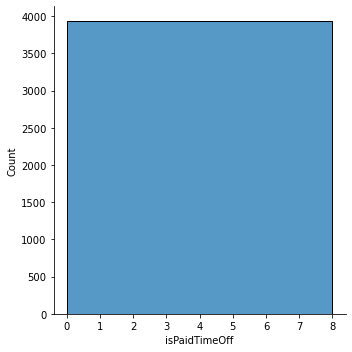

In [32]:
sns.displot(df, x="isPaidTimeOff", binwidth=8)


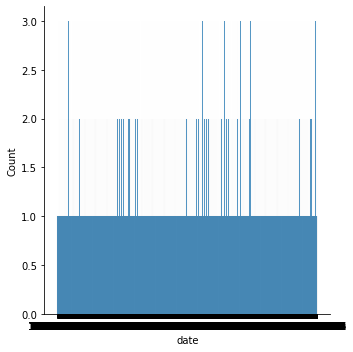

In [40]:
plt.rcParams['figure.figsize'] = [10, 8]

sns.displot(df, x="date", binwidth=8)


## What is the country with the highest number of tourists?

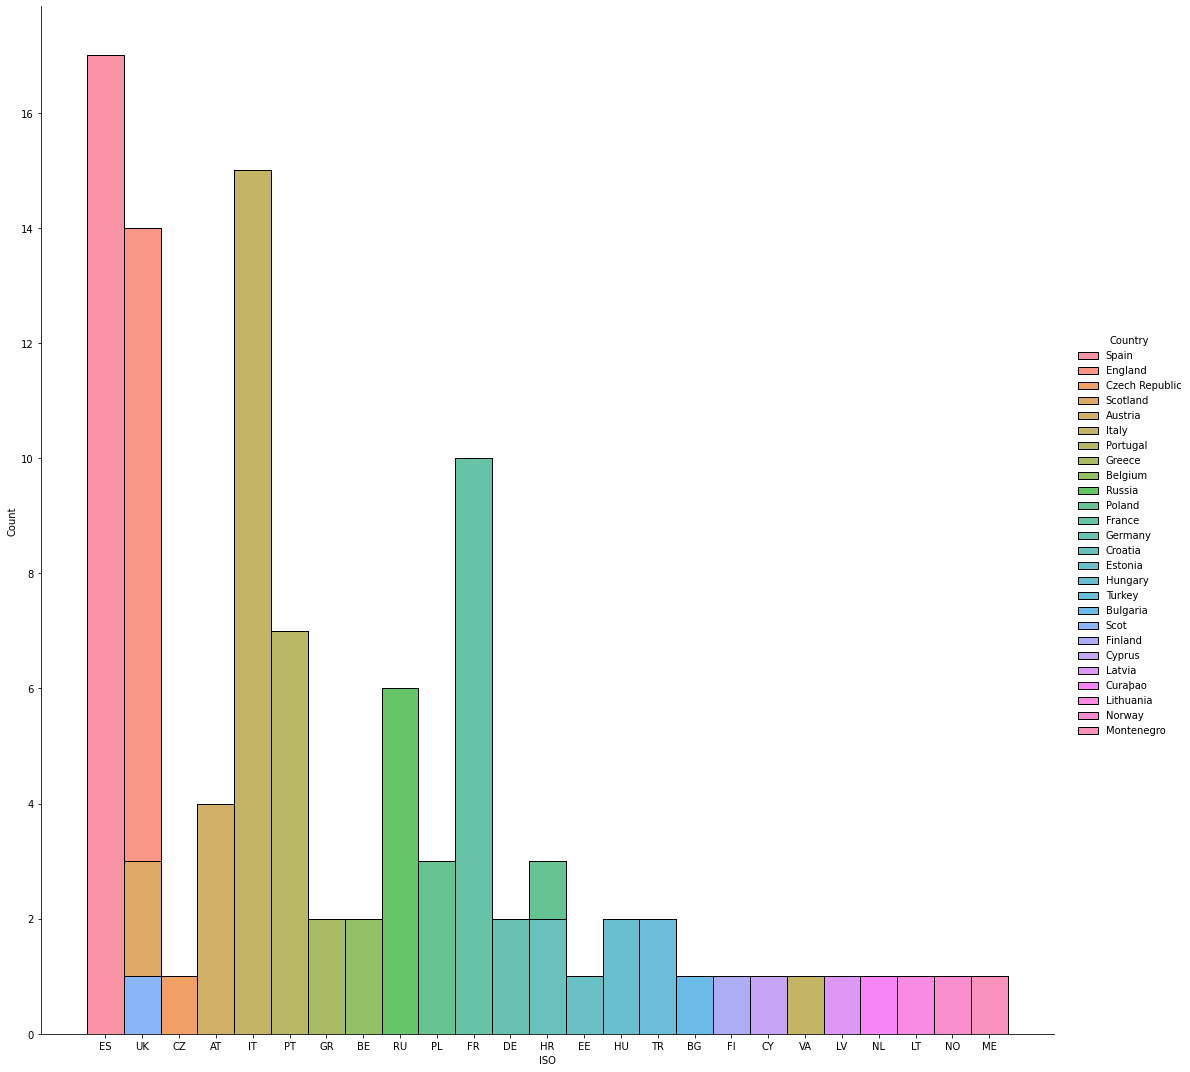

In [12]:
sns.displot(df1, x="ISO", bins=100,hue="Country", multiple="stack",height=15,aspect=1)


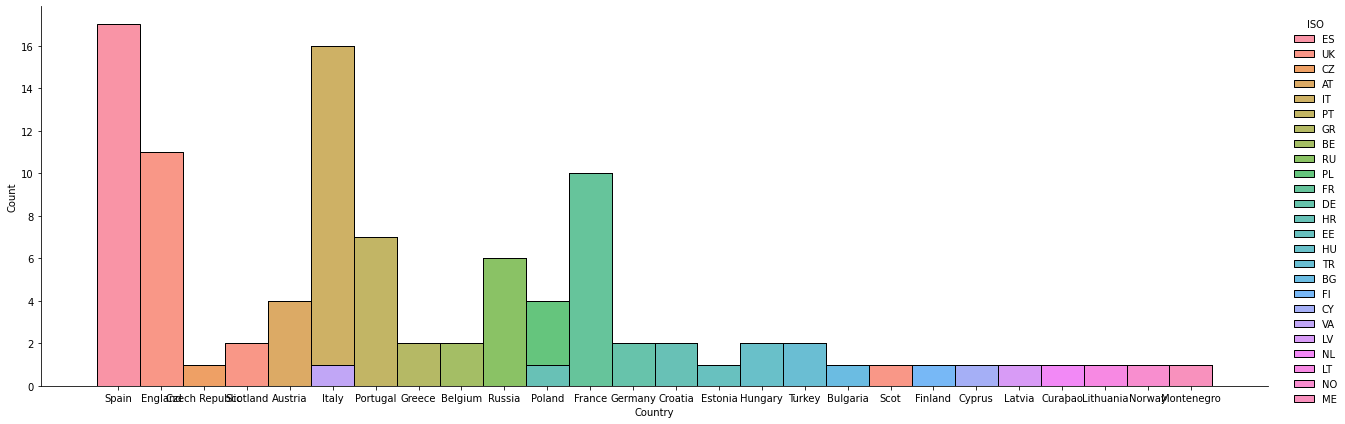

In [11]:
sns.displot(df1, x="Country", bins=20,hue="ISO", multiple="stack",height=6,aspect=3)


### Note :Looking at the graphs, we find that Spain is the largest country in the number of tourists

In [9]:
# removing missing values
df.dropna(inplace=True)

# Converting target variable 'Churn' into a binary numeric variable
df2 = df
df2['isPaidTimeOff'].replace(to_replace='Yes', value = 1, inplace= True)
df2['isPaidTimeOff'].replace(to_replace='No', value = 0, inplace= True)

# Converting all categorical variables into a dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,Unnamed: 0,countryOrRegion_India,countryOrRegion_United Kingdom,countryOrRegion_United States,holidayName_Battle of the Boyne [Northern Ireland],holidayName_Boxing Day,holidayName_Boxing Day (Observed),holidayName_Christmas,holidayName_Christmas Day,holidayName_Christmas Day (Observed),...,date_2098-08-15,date_2098-08-25,date_2098-09-01,date_2098-10-02,date_2098-10-13,date_2098-11-11,date_2098-11-27,date_2098-11-30,date_2098-12-25,date_2098-12-26
26,26,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,29,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,63,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


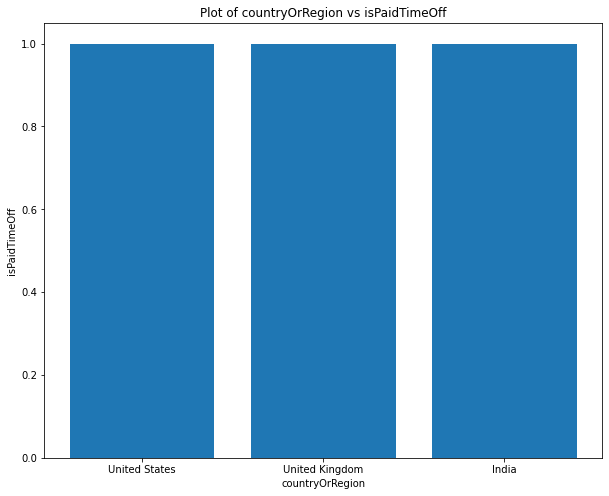

<Figure size 864x864 with 0 Axes>

In [38]:
plt.rcParams['figure.figsize'] = [10, 8]

plt.bar(df.countryOrRegion, df.isPaidTimeOff)
plt.title("Plot of countryOrRegion vs isPaidTimeOff")
plt.xlabel("countryOrRegion")
plt.ylabel("isPaidTimeOff")
plt.show()
plt.figure(figsize=(12,12))
plt.rcParams["figure.figsize"] = (10, 5)


### The three largest countries isPaidTimeOff or on  (unaited states , unaited kingdom, india)

<AxesSubplot:xlabel='countryOrRegion', ylabel='countryRegionCode'>

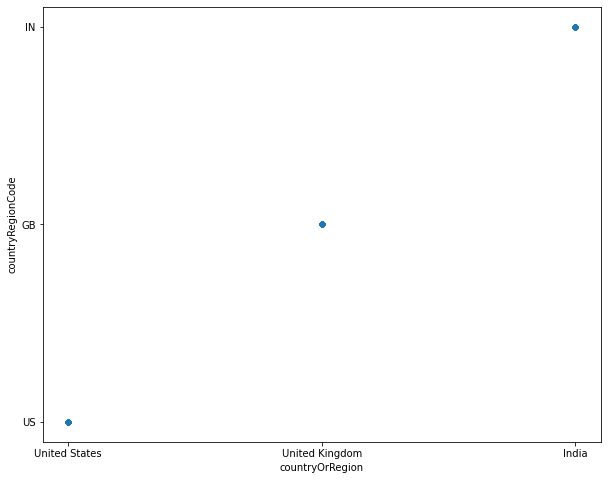

In [39]:
plt.rcParams['figure.figsize'] = [10, 8]

df[['countryOrRegion', 'countryRegionCode']].plot.scatter(x ='countryOrRegion', y='countryRegionCode')

## What is the largest country is paid or non ?

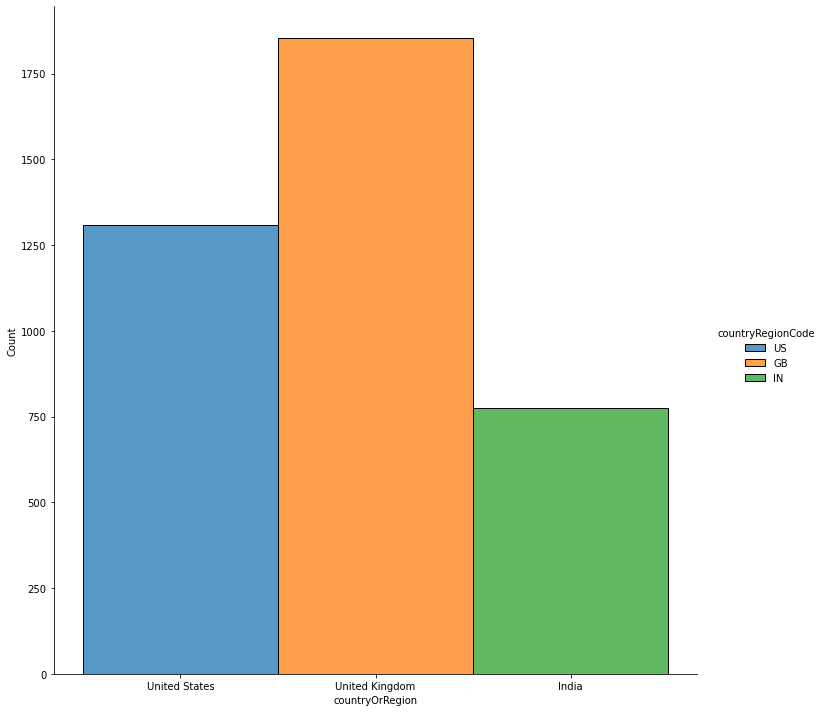

In [29]:
sns.displot(df, x="countryOrRegion", bins=100,hue="countryRegionCode", multiple="stack",height=10,aspect=1)


### Note Looking at the graph is the largest country is paid or non unaited states

In [9]:
plt.rcParams['font.sans-serif']=['SimHei']

In [10]:
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False

In [7]:
plt.rcParams["font.family"] = "Times New Roman"

In [11]:
pip install latex


Note: you may need to restart the kernel to use updated packages.


In [33]:
matplotlib.rcParams['text.latex.preamble'] = r'\input{/home/br/sweethome/temp/BigFatHeader}'


In [31]:
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2015/bin/x86_64-darwin'
print(os.getenv("PATH"))#sudo apt-get install y texlive texlive-latex-extra texlive-latex-recommended

C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Users\ahmed\AppData\Local\Programs\Python\Python38\Scripts\;C:\Users\ahmed\AppData\Local\Programs\Python\Python38\;C:\Users\ahmed\AppData\Local\Microsoft\WindowsApps;;/usr/local/texlive/2015/bin/x86_64-darwin


In [30]:
pip install latex

Note: you may need to restart the kernel to use updated packages.


In [17]:
plt.rcParams["font.family"] = "Times New Roman"


In [34]:
conda install -c conda-forge jupyter_latex_envs

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - jupyter_latex_envs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyter_contrib_core-0.3.3 |             py_2          15 KB  conda-forge
    jupyter_latex_envs-1.4.6   |  pyhd8ed1ab_1002         735 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         749 KB

The following NEW packages will be INSTALLED:

  jupyter_contrib_c~ conda-forge/noarch::jupyter_contrib_core-0.3.3-py_2
  jupyter_latex_envs conda-forge/noarch::jupyter_latex_envs-1.4.6-pyhd8ed1ab_1002
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> conda-forge::conda-4.11.0-py39hcbf5



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [ ]:
conda install -c conda-forge/label/cf201901 jupyter_latex_envs

In [22]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [15]:
 pip install fonts-nanum


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement fonts-nanum (from versions: none)
ERROR: No matching distribution found for fonts-nanum


In [25]:
conda install -c conda-forge matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py39hcbf5309_0        16.8 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.8 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> conda-forge::conda-4.11.0-py39hcbf5309_0




python_abi-3.9       | 4 KB      |            |   0% 
python_abi-3.9       | 4 KB      | ########## | 100% 
python_abi-3.9       | 4 KB      | ##########



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




conda-4.11.0         | 16.8 MB   | ##5        |  25% 
conda-4.11.0         | 16.8 MB   | ##6        |  26% 
conda-4.11.0         | 16.8 MB   | ##7        |  27% 
conda-4.11.0         | 16.8 MB   | ##8        |  28% 
conda-4.11.0         | 16.8 MB   | ##9        |  29% 
conda-4.11.0         | 16.8 MB   | ###        |  30% 
conda-4.11.0         | 16.8 MB   | ###1       |  31% 
conda-4.11.0         | 16.8 MB   | ###2       |  32% 
conda-4.11.0         | 16.8 MB   | ###3       |  33% 
conda-4.11.0         | 16.8 MB   | ###4       |  34% 
conda-4.11.0         | 16.8 MB   | ###5       |  35% 
conda-4.11.0         | 16.8 MB   | ###6       |  36% 
conda-4.11.0         | 16.8 MB   | ###7       |  37% 
conda-4.11.0         | 16.8 MB   | ###8       |  38% 
conda-4.11.0         | 16.8 MB   | ###9       |  39% 
conda-4.11.0         | 16.8 MB   | ####       |  40% 
conda-4.11.0         | 16.8 MB   | ####1      |  41% 
conda-4.11.0         | 16.8 MB   | ####2      |  42% 
conda-4.11.0         | 16.8 

In [14]:
import matplotlib
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'Calibri'

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[2]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

In [26]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font = { 'family' : 'normal', 
         'weight' : 'bold', 
         'size'   : 22 } 
 
matplotlib.rc('font', **font) 

In [19]:
font_download_url = "https://fonts.google.com/noto/specimen/Noto%20Sans%20JP"
#change_matplotlib_font(font_download_url)

In [21]:
plt.rc('axes', unicode_minus=False)


In [27]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [ ]:
ax = (df['holidayName'].value_counts()*100.0/len(df)).plot.pie(autopct='%.1F%%', labels = ['No', 'Yes'], figsize = (5, 5), fontsize = 12)
ax.set_ylabel('holidayName', fontsize = 12)
ax.set_title('% of holidayName', fontsize = 12)

In [1]:
pip install matplotlib==2.2.3

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ahmed\\AppData\\Local\\Temp\\pip-install-s9dsw3nl\\matplotlib_67db2fb8e32a4f3996db39cb21023c8b\\setup.py'"'"'; __file__='"'"'C:\\Users\\ahmed\\AppData\\Local\\Temp\\pip-install-s9dsw3nl\\matplotlib_67db2fb8e32a4f3996db39cb21023c8b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ahmed\AppData\Local\Temp\pip-wheel-_criymbr'
       cwd: C:\Users\ahmed\AppData\Local\Temp\pip-install-s9dsw3nl\matplotlib_67db2fb8e32a4f3996db39cb21023c8b\
  Complete output (529 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
              matplotlib: yes [2.2


  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:


                  qt5agg: yes [installing, Qt: 5.9.7, PyQt: 5.9.2; PySide2 not
                          found]
                  qt4agg: no  [PySide not found; PyQt4 not found]
                 gtk3agg: no  [Requires pygobject to be installed.]
               gtk3cairo: no  [Requires cairocffi or pycairo to be installed.]
                  gtkagg: no  [Requires pygtk]
                   tkagg: yes [installing; run-time loading from Python Tcl /
                          Tk]
                   wxagg: no  [requires wxPython]
                     gtk: no  [Requires pygtk]
                     agg: yes [installing]
                   cairo: no  [cairocffi or pycairo not found]
               windowing: yes [installing]
  
  OPTIONAL LATEX DEPENDENCIES
                  dvipng: no
             ghostscript: no
                   latex: no
                 pdftops: no
  
  OPTIONAL PACKAGE DATA
                    dlls: no  [skipping due to configuration]
  
  running bdist_wheel
  running b

In [8]:
df1['ISO']

0     ES
1     ES
2     UK
3     ES
4     CZ
      ..
95    IT
96    ES
97    ES
98    FR
99    IT
Name: ISO, Length: 100, dtype: object

### visualize column countryRegionCode 

In [10]:
df1['Country']

0              Spain
1              Spain
2            England
3              Spain
4     Czech Republic
           ...      
95             Italy
96             Spain
97             Spain
98            France
99             Italy
Name: Country, Length: 100, dtype: object

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x="countryRegionCode", hue='countryRegionCode',  data=df)
plt.title('country_destination with affiliate_channel Distribution')
plt.xticks(rotation=90)
plt.show()

In [11]:
boolean = df1.duplicated().any() # False
boolean = df1.duplicated(subset=['Country','ISO']).any()

### 

In [ ]:
import pandas as pd
import io
sns.displot(df, x="countryRegionCode", bins=20,hue="date", multiple="stack")


In [ ]:
!pip install --upgrade seaborn==0.9.0

In [ ]:
df['normalizeHolidayName'] = df.index
%matplotlib inline
import seaborn as sns
sns.factorplot(x='normalizeHolidayName', y='date', data=df)

### Clean data 

In [4]:
df = pd.DataFrame({'B': [10, 0, 20, 0, 1], 'A': [100, np.nan, 500, np.nan, np.nan]})
df.drop(index=df[df['A'].isnull() & df['B'] != 0].index, inplace=True)
df['A'] = df['A'].fillna(0)

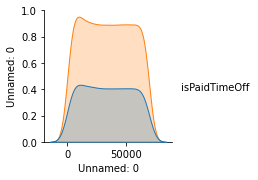

In [45]:
plt.rcParams['figure.figsize'] = [29, 8]

sns.pairplot(df, hue="isPaidTimeOff",)
#df['Heavy Rain Indicator'] = df['Weather'].str.contains('|'.join(heavy_rain_indicator))


### drop mising data

In [6]:
newdf = df1.dropna(how = 'any')
newdf1 = df.dropna(how = 'any')


In [8]:
#sns.displot(df1, x="Country", bins=20,hue="Name", multiple="ISO")

df[['countryRegionCode', 'isPaidTimeOff']].agg(["max","min","mean"])

,isPaidTimeOff
max,True
min,False
mean,0.685053


In [ ]:
sns.catplot(x="isPaidTimeOff", y="normalizeHolidayName", hue="date", kind="point", data=df)

In [4]:
df.corr()

,Unnamed: 0
Unnamed: 0,1.0


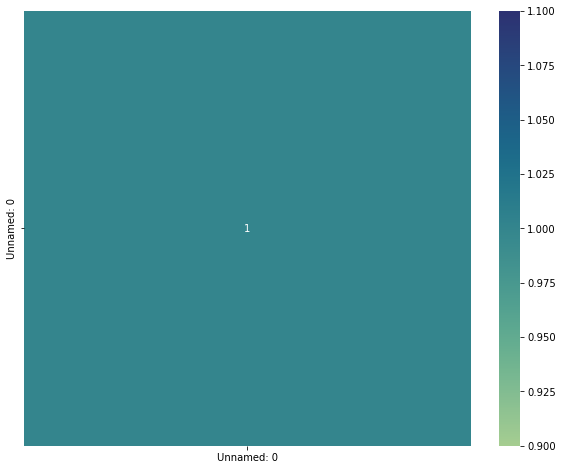

In [46]:
plt.rcParams['figure.figsize'] = [10, 8]

sns.heatmap(df.corr(), cbar=True, annot = True , cmap = 'crest')
plt.show()

In [20]:
plt.rc('font', family='Arial')



In [15]:
df['normalizeHolidayName'].sum()

"Año Nuevo [New Year's Day]New Year's DayNeujahrNieuwjaarsdagAno novoNew Year's DayAño Nuevo [New Year's Day]Nova GodinaNový rokNytårsdagUudenvuodenpäiväJour de l'anÚjévCapodanno元日Año Nuevo [New Year's Day]NieuwjaarsdagNew Year's DayFørste nyttårsdagNowy RokAno NovoNew Year's DayAño nuevoNyårsdagenNeujahrestagНовий рікNew Year's DayDay after New Year's DayNew Year HolidayNew Year HolidaySøndagSöndagHeilige Drei KönigeSveta tri kraljaLoppiainenEpifania del SignoreEpifanía del SeñorTrettondedag julSøndagSöndagDía de los Reyes Magos [Epiphany]Makar Sankranti / Pongal成人の日SøndagSöndagSøndagSöndagAustralia DayRepublic DaySøndagSöndagDía de la Constitución [Constitution Day]SøndagSöndagDía de Carnaval [Carnival's Day]Día de Carnaval [Carnival's Day]CarnavalQuarta-feira de cinzas (Início da Quaresma)建国記念の日SøndagSöndagSøndagSöndagWashington's BirthdaySøndagSöndagSøndagSöndagМіжнародний жіночий деньSøndagSöndagSt. Patrick's DaySt. Patrick's DaySt. Patrick's DayA Tanácsköztársaság kikiáltásának ü

## What countries do not know the value of their tourists paid or non ?

In [4]:
df.groupby('countryRegionCode')['isPaidTimeOff'].mean()

countryRegionCode
AR         NaN
AT         NaN
AU         NaN
BE         NaN
BR         NaN
BY         NaN
CA         NaN
CH         NaN
CO         NaN
CZ         NaN
DE         NaN
DK         NaN
ES         NaN
FI         NaN
FR         NaN
GB    0.698327
HR         NaN
HU         NaN
IE         NaN
IM         NaN
IN    0.500000
IT         NaN
JP         NaN
MX         NaN
NL         NaN
NO         NaN
NZ         NaN
PL         NaN
PT         NaN
SE         NaN
SI         NaN
UA         NaN
US    0.775822
ZA         NaN
Name: isPaidTimeOff, dtype: float64

## How many values are known in a column countryRegionCode?

In [7]:
df['countryRegionCode']

0         AR
1         AU
2         AT
3         BE
4         BR
        ... 
69552     SE
69553     GB
69554    NaN
69555     NO
69556     SE
Name: countryRegionCode, Length: 69557, dtype: object

In [13]:
df['countryRegionCode'].count()

64559

### known in a column countryRegionCode is 64559

In [16]:
df[df['countryRegionCode'].isnull()]

,Unnamed: 0,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
28,28,Scotland,New Year Holiday,New Year Holiday,NaN,NaN,1970-01-02
72,72,Northern Ireland,St. Patrick's Day,St. Patrick's Day,NaN,NaN,1970-03-17
92,92,England,Good Friday,Good Friday,NaN,NaN,1970-03-27
97,97,Northern Ireland,Good Friday,Good Friday,NaN,NaN,1970-03-27
100,100,Scotland,Good Friday,Good Friday,NaN,NaN,1970-03-27
...,...,...,...,...,...,...,...
69530,69530,Wales,Christmas Day,Christmas Day,NaN,NaN,2098-12-25
69537,69537,England,Boxing Day,Boxing Day,NaN,NaN,2098-12-26
69546,69546,Northern Ireland,Boxing Day,Boxing Day,NaN,NaN,2098-12-26
69549,69549,Scotland,Boxing Day,Boxing Day,NaN,NaN,2098-12-26


### The number of whose value is 'NAN' is 4998

In [21]:
newdf = df['normalizeHolidayName'].dropna(how = 'any')


<AxesSubplot:ylabel='isPaidTimeOff'>

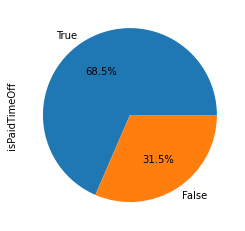

In [15]:
round(df['isPaidTimeOff'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%' )

### Looking at the graph, we find that most of the percentage or the highest percentage are paid vacations

In [ ]:
df.plot(x="holidayName", y="date", kind="scatter")

<AxesSubplot:xlabel='holidayName', ylabel='date'>

In [26]:
cat_totals = df.groupby("countryOrRegion")["date"].sum().sort_values()
cat_totals['Portugal']

'1970-01-011970-03-271970-03-291970-04-251970-05-011970-05-281970-06-101970-08-151970-10-051970-11-011970-12-011970-12-081970-12-251971-01-011971-04-091971-04-111971-04-251971-05-011971-06-101971-08-151971-10-051971-11-011971-12-011971-12-081971-12-251972-01-011972-03-311972-04-021972-04-251972-05-011972-06-011972-06-101972-08-151972-10-051972-11-011972-12-011972-12-081972-12-251973-01-011973-04-201973-04-221973-04-251973-05-011973-06-101973-06-211973-08-151973-10-051973-11-011973-12-011973-12-081973-12-251974-01-011974-04-121974-04-141974-04-251974-05-011974-06-101974-06-131974-08-151974-10-051974-11-011974-12-011974-12-081974-12-251975-01-011975-03-281975-03-301975-04-251975-05-011975-05-291975-06-101975-08-151975-10-051975-11-011975-12-011975-12-081975-12-251976-01-011976-04-161976-04-181976-04-251976-05-011976-06-101976-06-171976-08-151976-10-051976-11-011976-12-011976-12-081976-12-251977-01-011977-04-081977-04-101977-04-251977-05-011977-06-091977-06-101977-08-151977-10-051977-11-0

In [45]:
cat_totals = df1.groupby("Country")["ISO"].sum().sort_values()
cat_totals['Portugal']

'PTPTPTPTPTPTPT'

In [47]:
df1.columns

Index(['ID', 'Name', 'Country', 'ISO'], dtype='object')

In [53]:
df1['Country'].value_counts()

Spain             17
Italy             16
England           11
France            10
Portugal           7
Russia             6
Austria            4
Poland             4
Turkey             2
Hungary            2
Germany            2
Croatia            2
Belgium            2
Greece             2
Scotland           2
Estonia            1
Czech Republic     1
Bulgaria           1
Scot               1
Finland            1
Cyprus             1
Latvia             1
Curaþao            1
Lithuania          1
Norway             1
Montenegro         1
Name: Country, dtype: int64

In [54]:
df1['ISO'].value_counts()

ES    17
IT    15
UK    14
FR    10
PT     7
RU     6
AT     4
PL     3
HR     3
BE     2
GR     2
DE     2
HU     2
TR     2
CZ     1
EE     1
BG     1
FI     1
CY     1
VA     1
LV     1
NL     1
LT     1
NO     1
ME     1
Name: ISO, dtype: int64

In [8]:
df.iloc[4586]

Unnamed: 0                             4586
countryOrRegion                    Scotland
holidayName             Spring Bank Holiday
normalizeHolidayName    Spring Bank Holiday
isPaidTimeOff                           NaN
countryRegionCode                       NaN
date                             1979-05-28
Name: 4586, dtype: object

### Conclusions:
This report aims to increase the level of awareness of the intellectual and technical issues surrounding the analysis of massive data. This is not the first report written on massive data, and it will not be the last, but given the major attention currently being paid to massive data in science, technology, and government, the committee believes that it is a particularly appropriate time to be considering these issues.
This final section begins by summarizing some of the key conclusions from the report. It then provides a few additional concluding remarks. 


                                                    Thanks for reading